$$
\begin{array}{c}
\textbf{\LARGE Universidad Externado de Colombia} \\[1.2em]
\textbf{\Large MINE\_009 ejercicios de clusters APES} \\[2em]
\textbf{\large Presenta: José Darío Hernández} \\[0.8em]
\textbf{\large Docente: Wilmer Dario Pineda} \\[2em]
\textbf{\normalsize Bogotá D.C., 2025}
\end{array}
$$


In [ ]:
# =========================================================
# importar Librerías y módulos necesarios
# =========================================================

# Manipulación de datos
import os
import time
import pickle
import gzip
import unicodedata
import difflib
import numpy as np
import pandas as pd
# Visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()  # Paleta de colores predeterminada
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    log_loss,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    auc,
    roc_auc_score
)
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal


In [6]:
# Cargar conjunto de datos
nacimientos = pd.read_excel('../datos/candelaria.xlsx')
nacimientos.head(5)

,Item,IDCodigoDepartamento,Departamento,CodigoMunicipio,Nombre/Municipio,Departamento Nacimiento,Municipio de Nacimiento,Sexo,Peso (gr),Talla (cm),...,Centro Poblado,Rural Disperso,Número Hijos Nacidos Vivos,Fecha Anterior Hijo Nacido Vivo,Número Embarazos,Régimen Seguridad,Tipo Administradora,Edad Padre,Nivel Educativo Padre,Ultimo Año Aprobado Padre
0,1,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,CALI,MASCULINO,2085,48,...,NaN,NaN,2,03/21/2009 12:00:00 AM,2,NO ASEGURADO,NaN,28.0,MEDIA ACADÉMICA O CLÁSICA,11.0
1,2,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,CALI,FEMENINO,2963,48,...,VILLA GORGONA,NaN,1,NaN,1,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,16.0,MEDIA ACADÉMICA O CLÁSICA,11.0
2,3,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,PALMIRA,FEMENINO,3400,52,...,EL CABUYAL,NaN,1,NaN,1,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,33.0,MEDIA ACADÉMICA O CLÁSICA,11.0
3,4,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,CALI,FEMENINO,2814,47,...,PUEBLITO VIEJO,NaN,2,09/21/2015 12:00:00 AM,2,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,21.0,TÉCNICA PROFESIONAL,2.0
4,5,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,CALI,MASCULINO,4060,52,...,NaN,NaN,1,NaN,1,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,22.0,MEDIA ACADÉMICA O CLÁSICA,11.0


In [7]:
nacimientos.columns

Index(['Item', 'IDCodigoDepartamento', 'Departamento', 'CodigoMunicipio',
       'Nombre/Municipio', 'Departamento Nacimiento',
       'Municipio de Nacimiento', 'Sexo', 'Peso (gr)', 'Talla (cm)',
       'Fecha de Nacimiento', 'Parto Atendido Por',
       'Tiempo De Gestación (Sem)', 'Número Consultas Prenatales',
       'Tipo Parto', 'Grupo Sanguineo', 'Factor RH', 'Pertenencia Étnica',
       'Edad Madre', 'Estado Conyugal Madre', 'Nivel Educativo Madre',
       'Ultimo Año Aprobado Madre', 'País Residencia',
       'Departamento Residencia', 'Municipio Residencia', 'Area Residencia',
       'Barrio', 'Centro Poblado', 'Rural Disperso',
       'Número Hijos Nacidos Vivos', 'Fecha Anterior Hijo Nacido Vivo',
       'Número Embarazos', 'Régimen Seguridad', 'Tipo Administradora',
       'Edad Padre', 'Nivel Educativo Padre', 'Ultimo Año Aprobado Padre'],
      dtype='object')

In [8]:
# Mostramos los datos básicos de los listados
pd.options.display.max_columns = 100
nacimientos.head(3)

,Item,IDCodigoDepartamento,Departamento,CodigoMunicipio,Nombre/Municipio,Departamento Nacimiento,Municipio de Nacimiento,Sexo,Peso (gr),Talla (cm),Fecha de Nacimiento,Parto Atendido Por,Tiempo De Gestación (Sem),Número Consultas Prenatales,Tipo Parto,Grupo Sanguineo,Factor RH,Pertenencia Étnica,Edad Madre,Estado Conyugal Madre,Nivel Educativo Madre,Ultimo Año Aprobado Madre,País Residencia,Departamento Residencia,Municipio Residencia,Area Residencia,Barrio,Centro Poblado,Rural Disperso,Número Hijos Nacidos Vivos,Fecha Anterior Hijo Nacido Vivo,Número Embarazos,Régimen Seguridad,Tipo Administradora,Edad Padre,Nivel Educativo Padre,Ultimo Año Aprobado Padre
0,1,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,CALI,MASCULINO,2085,48,2018-01-01 00:00:00,MÉDICO,36,5,ESPONTÁNEO,O,POSITIVO,"NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO...",26,NO ESTÁ CASADA Y LLEVA DOS AÑOS O MÁS VIVIENDO...,TÉCNICA PROFESIONAL,2.0,COLOMBIA,VALLE DEL CAUCA,JAMUNDÍ,CABECERA MUNICIPAL,EL ROSARIO,NaN,NaN,2,03/21/2009 12:00:00 AM,2,NO ASEGURADO,NaN,28.0,MEDIA ACADÉMICA O CLÁSICA,11.0
1,2,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,CALI,FEMENINO,2963,48,2018-02-01 00:00:00,MÉDICO,39,6,ESPONTÁNEO,O,POSITIVO,NINGUNO DE LOS ANTERIORES,16,ESTÁ SOLTERA,MEDIA ACADÉMICA O CLÁSICA,11.0,COLOMBIA,VALLE DEL CAUCA,CANDELARIA,"CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CA...",NaN,VILLA GORGONA,NaN,1,NaN,1,CONTRIBUTIVO,ENTIDAD PROMOTORA DE SALUD,16.0,MEDIA ACADÉMICA O CLÁSICA,11.0
2,3,76,VALLE DEL CAUCA,130,ALCALDIA DE CANDELARIA,VALLE DEL CAUCA,PALMIRA,FEMENINO,3400,52,2018-02-01 00:00:00,MÉDICO,37,8,ESPONTÁNEO,O,POSITIVO,NINGUNO DE LOS ANTERIORES,28,ESTÁ SOLTERA,TECNOLÓGICA,2.0,COLOMBIA,VALLE DEL CAUCA,CANDELARIA,"CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CA...",NaN,EL CABUYAL,NaN,1,NaN,1,SUBSIDIADO,ENTIDAD PROMOTORA DE SALUD SUBSIDIADO,33.0,MEDIA ACADÉMICA O CLÁSICA,11.0


<h2>Preparación de los datos</h2>

Es necesario realizar una preparación previa del conjunto de datos a trabajar, en primer lugar, para trabajar con las variables categóricas, usamos el método llamado One Hot Encoding. La estrategia que implementa es crear una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0. Después de esto, realizamos un escalado de las variables seleccionadas para que, de entrada, no haya ninguna que domine a las demás y no se vicie el análisis.

In [9]:
vars_nacimiento=nacimientos.copy()
vars_nacimiento = ['Peso (gr)', 'Talla (cm)', 'Tiempo De Gestación (Sem)', 
                'Sexo', 'Tipo Parto', 'Grupo Sanguineo', 'Factor RH','Edad Madre', 'Estado Conyugal Madre', 'Nivel Educativo Madre',
                'Número Consultas Prenatales', 'Número Embarazos', 'Número Hijos Nacidos Vivos','Area Residencia', 'Pertenencia Étnica', 'Régimen Seguridad']

df_subset = nacimientos[vars_nacimiento]

In [10]:
print(df_subset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Peso (gr)                    297 non-null    int64 
 1   Talla (cm)                   297 non-null    int64 
 2   Tiempo De Gestación (Sem)    297 non-null    int64 
 3   Sexo                         297 non-null    object
 4   Tipo Parto                   297 non-null    object
 5   Grupo Sanguineo              275 non-null    object
 6   Factor RH                    275 non-null    object
 7   Edad Madre                   297 non-null    int64 
 8   Estado Conyugal Madre        297 non-null    object
 9   Nivel Educativo Madre        297 non-null    object
 10  Número Consultas Prenatales  297 non-null    int64 
 11  Número Embarazos             297 non-null    int64 
 12  Número Hijos Nacidos Vivos   297 non-null    int64 
 13  Area Residencia              297 no

In [11]:
print(df_subset.describe(include="all"))

          Peso (gr)  Talla (cm)  Tiempo De Gestación (Sem)       Sexo  \
count    297.000000  297.000000                 297.000000        297   
unique          NaN         NaN                        NaN          2   
top             NaN         NaN                        NaN  MASCULINO   
freq            NaN         NaN                        NaN        166   
mean    3173.892256   50.067340                  38.572391        NaN   
std      501.202050    2.715479                   1.834995        NaN   
min     1405.000000   31.000000                  25.000000        NaN   
25%     2895.000000   49.000000                  38.000000        NaN   
50%     3200.000000   50.000000                  39.000000        NaN   
75%     3480.000000   52.000000                  40.000000        NaN   
max     5175.000000   57.000000                  41.000000        NaN   

        Tipo Parto Grupo Sanguineo Factor RH  Edad Madre  \
count          297             275       275  297.000000   
uni

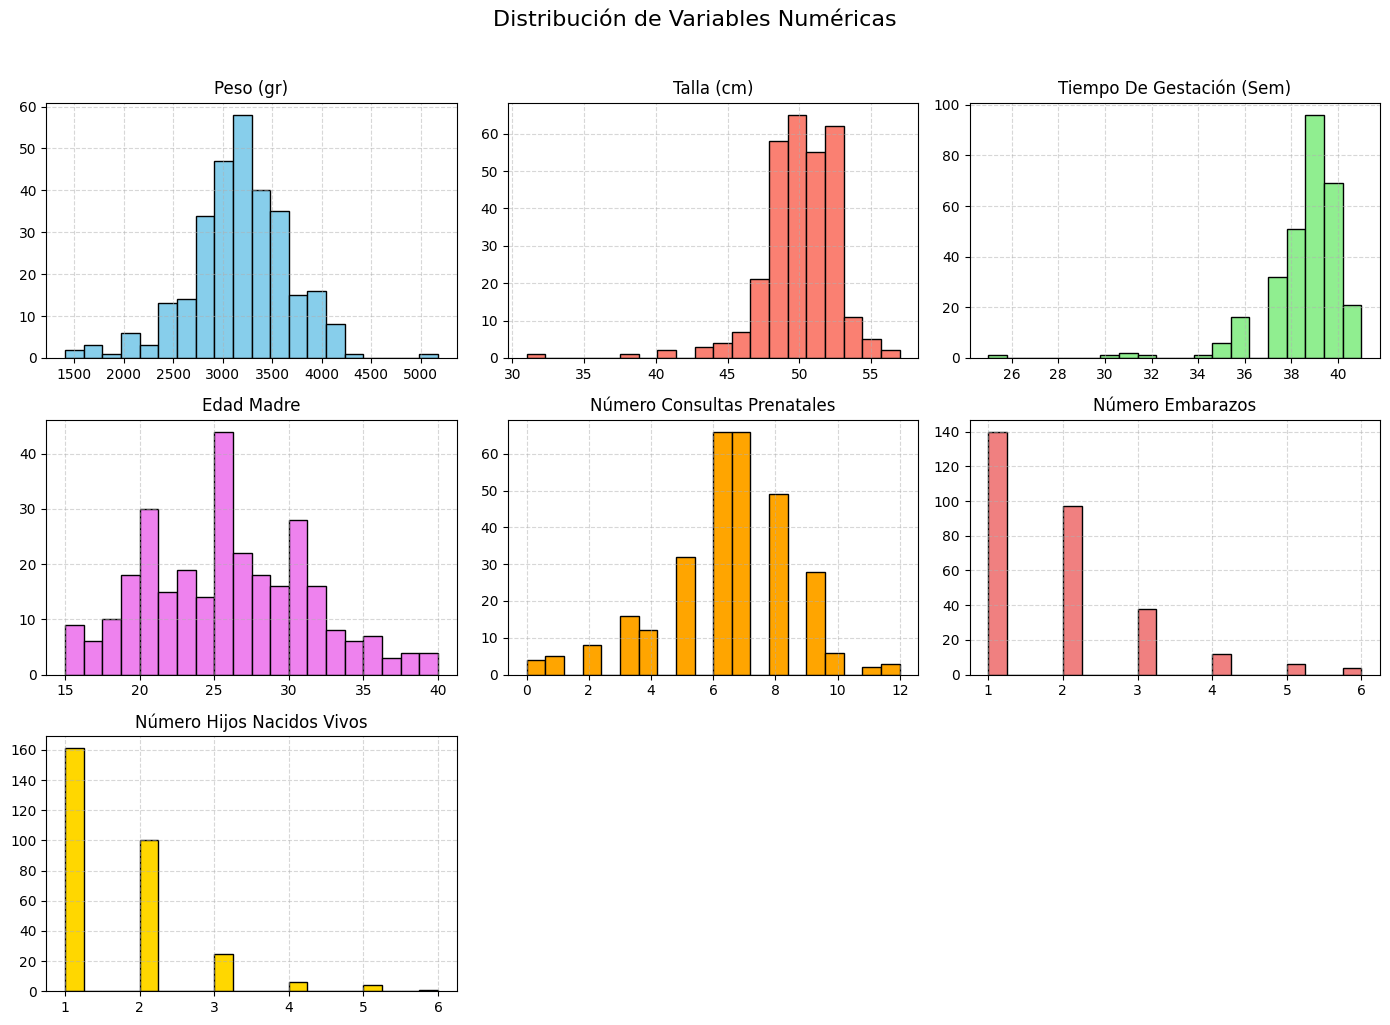

In [14]:
# =========================================================
# Histogramas de variables numéricas con colores distintos
# =========================================================

import matplotlib.pyplot as plt

num_vars = ['Peso (gr)', 'Talla (cm)', 'Tiempo De Gestación (Sem)', 
            'Edad Madre', 'Número Consultas Prenatales', 
            'Número Embarazos', 'Número Hijos Nacidos Vivos']

colores = ['skyblue', 'salmon', 'lightgreen', 'violet', 'orange', 'lightcoral', 'gold']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    axes[i].hist(df_subset[var].dropna(), bins=20, color=colores[i], edgecolor='black')
    axes[i].set_title(var, fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Si quedan subplots vacíos (menos variables que subplots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



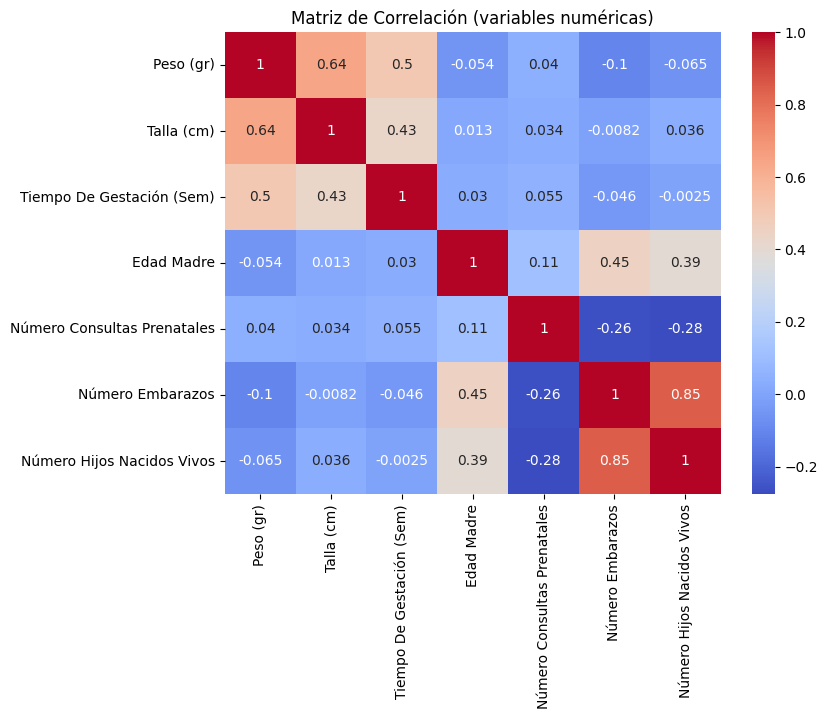

In [15]:
# =========================================================
# Matriz de correlación de variables numéricas con heatmap
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_subset[num_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación (variables numéricas)")
plt.show()


In [16]:
# Tabla de frecuencias absolutas y relativas de las variables categóricas
cat_vars = ['Sexo', 'Tipo Parto', 'Grupo Sanguineo', 'Factor RH',
            'Estado Conyugal Madre', 'Nivel Educativo Madre',
            'Area Residencia', 'Pertenencia Étnica', 'Régimen Seguridad']

# Crear un diccionario con las tablas
tablas_categoricas = {}

for var in cat_vars:
    tabla = df_subset[var].value_counts(dropna=False).reset_index()
    tabla.columns = [var, "Frecuencia"]
    tabla["Porcentaje (%)"] = round((tabla["Frecuencia"] / len(df_subset)) * 100, 2)
    tablas_categoricas[var] = tabla


# Si quieres ver todas en un loop:
for var, tabla in tablas_categoricas.items():
    print(f"\nDistribución de {var}")
    print(tabla)


Distribución de Sexo
        Sexo  Frecuencia  Porcentaje (%)
0  MASCULINO         166           55.89
1   FEMENINO         131           44.11

Distribución de Tipo Parto
   Tipo Parto  Frecuencia  Porcentaje (%)
0  ESPONTÁNEO         201           67.68
1     CESÁREA          96           32.32

Distribución de Grupo Sanguineo
  Grupo Sanguineo  Frecuencia  Porcentaje (%)
0               O         169           56.90
1               A          64           21.55
2               B          36           12.12
3             NaN          22            7.41
4              AB           6            2.02

Distribución de Factor RH
  Factor RH  Frecuencia  Porcentaje (%)
0  POSITIVO         263           88.55
1       NaN          22            7.41
2  NEGATIVO          12            4.04

Distribución de Estado Conyugal Madre
                               Estado Conyugal Madre  Frecuencia  \
0  NO ESTÁ CASADA Y LLEVA DOS AÑOS O MÁS VIVIENDO...         157   
1  NO ESTÁ CASADA Y LLEVA MENO

In [17]:
# Ejemplo: mostrar la tabla de 'Sexo'
print(tablas_categoricas['Pertenencia Étnica'])

                                  Pertenencia Étnica  Frecuencia  \
0                          NINGUNO DE LOS ANTERIORES         256   
1  NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO...          41   

   Porcentaje (%)  
0            86.2  
1            13.8  


In [18]:
df_subset.describe()

,Peso (gr),Talla (cm),Tiempo De Gestación (Sem),Edad Madre,Número Consultas Prenatales,Número Embarazos,Número Hijos Nacidos Vivos
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,3173.892256,50.067340,38.572391,25.818182,6.387205,1.851852,1.636364
std,501.202050,2.715479,1.834995,5.454412,2.131228,1.067773,0.867443
min,1405.000000,31.000000,25.000000,15.000000,0.000000,1.000000,1.000000
25%,2895.000000,49.000000,38.000000,22.000000,5.000000,1.000000,1.000000
50%,3200.000000,50.000000,39.000000,26.000000,7.000000,2.000000,1.000000
75%,3480.000000,52.000000,40.000000,30.000000,8.000000,2.000000,2.000000
max,5175.000000,57.000000,41.000000,40.000000,12.000000,6.000000,6.000000


In [20]:
# =========================================================
# Función para codificar el grupo étnico
# =========================================================
# Esta función recibe un valor de grupo étnico y devuelve:
# - 'NMA' si pertenece a la categoría "NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO DESCENDIENTE"
# - 'Ninguno' para cualquier otro valor

def codif_grupoetnico(grupo):
    if grupo == "NEGRO(A), MULATO(A), AFRO COLOMBIANO(A) O AFRO DESCENDIENTE":
        return 'NMA'
    else:
        return 'Ninguno'


In [21]:
# =========================================================
# Función para codificar tipo de residencia
# =========================================================
# Esta función recibe un valor de residencia y devuelve:
# - 'Cabecera' si es "CABECERA MUNICIPAL"
# - 'Centro_Poblado' si es "CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)"
# - 'Rural_Disperso' para cualquier otro valor

def codif_residencia(resid):
    if resid == "CABECERA MUNICIPAL":
        return 'Cabecera'
    elif resid == "CENTRO POBLADO (INSPECCIÓN, CORREGIMIENTO O CASERÍO)":
        return 'Centro_Poblado'
    else:
        return 'Rural_Disperso'


In [22]:
# =========================================================
# Función para codificar nivel de escolaridad
# =========================================================
# Esta función recibe un valor de escolaridad y devuelve:
# - 'Primaria' para 'BÁSICA PRIMARIA'
# - 'Secundaria' para 'BÁSICA SECUNDARIA ' y 'MEDIA ACADÉMICA O CLÁSICA '
# - 'Ninguno' si no hay escolaridad registrada
# - 'Educ_Sup' para cualquier otro nivel de educación superior

def codif_escolaridad(escol):
    if escol == 'BÁSICA PRIMARIA':
        return 'Primaria'
    elif escol == 'BÁSICA SECUNDARIA ':
        return 'Secundaria'
    elif escol == 'MEDIA ACADÉMICA O CLÁSICA ':
        return 'Secundaria'
    elif escol == "NINGUNO":
        return 'Ninguno'
    else:
        return 'Educ_Sup'


In [23]:
# =========================================================
# Aplicación de funciones de codificación a columnas del dataframe
# =========================================================
# Se transforman las variables categóricas originales en categorías codificadas:
# - 'Pertenencia Étnica' usando codif_grupoetnico
# - 'Area Residencia' usando codif_residencia
# - 'Escolaridad' usando codif_escolaridad

df_subset['Pertenencia Étnica'] = df_subset['Pertenencia Étnica'].apply(codif_grupoetnico)
df_subset['Area Residencia'] = df_subset['Area Residencia'].apply(codif_residencia)
df_subset['Escolaridad'] = df_subset['Nivel Educativo Madre'].apply(codif_escolaridad)

df_subset.head()


C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\84109669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Pertenencia Étnica'] = df_subset['Pertenencia Étnica'].apply(codif_grupoetnico)
C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\84109669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Area Residencia'] = df_subset['Area Residencia'].apply(codif_residencia)
C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\84109669.py:11: SettingWithCopyWarning: 
A value is trying to be se

,Peso (gr),Talla (cm),Tiempo De Gestación (Sem),Sexo,Tipo Parto,Grupo Sanguineo,Factor RH,Edad Madre,Estado Conyugal Madre,Nivel Educativo Madre,Número Consultas Prenatales,Número Embarazos,Número Hijos Nacidos Vivos,Area Residencia,Pertenencia Étnica,Régimen Seguridad,Escolaridad
0,2085,48,36,MASCULINO,ESPONTÁNEO,O,POSITIVO,26,NO ESTÁ CASADA Y LLEVA DOS AÑOS O MÁS VIVIENDO...,TÉCNICA PROFESIONAL,5,2,2,Cabecera,NMA,NO ASEGURADO,Educ_Sup
1,2963,48,39,FEMENINO,ESPONTÁNEO,O,POSITIVO,16,ESTÁ SOLTERA,MEDIA ACADÉMICA O CLÁSICA,6,1,1,Centro_Poblado,Ninguno,CONTRIBUTIVO,Secundaria
2,3400,52,37,FEMENINO,ESPONTÁNEO,O,POSITIVO,28,ESTÁ SOLTERA,TECNOLÓGICA,8,1,1,Centro_Poblado,Ninguno,SUBSIDIADO,Educ_Sup
3,2814,47,39,FEMENINO,CESÁREA,O,POSITIVO,24,NO ESTÁ CASADA Y LLEVA DOS AÑOS O MÁS VIVIENDO...,TÉCNICA PROFESIONAL,7,2,2,Centro_Poblado,Ninguno,CONTRIBUTIVO,Educ_Sup
4,4060,52,39,MASCULINO,ESPONTÁNEO,A,POSITIVO,21,ESTÁ CASADA,TÉCNICA PROFESIONAL,5,1,1,Cabecera,Ninguno,SUBSIDIADO,Educ_Sup


In [25]:
# =========================================================
# 1) Función para normalizar nombres de columnas
# =========================================================
# Convierte a minúsculas, elimina acentos y caracteres especiales,
# reemplaza separadores raros por espacios y colapsa espacios repetidos.
def normalize_col(s: str) -> str:
    s = s.lower()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    for ch in ['/', '-', '–', '—']:
        s = s.replace(ch, ' ')
    s = ' '.join(s.split())
    return s

# Conservar copia del mapeo original -> normalizado
original_cols = list(df_subset.columns)
norm_cols = [normalize_col(c) for c in original_cols]
rename_map = dict(zip(original_cols, norm_cols))
dfn = df_subset.rename(columns=rename_map)

# =========================================================
# 2) Definir las columnas de interés en su versión NORMALIZADA
# =========================================================
num_vars_target = [
    'peso gr', 'talla cm', 'tiempo de gestacion sem',
    'edad madre', 'numero consultas prenatales',
    'numero embarazos', 'numero hijos nacidos vivos'
]

cat_vars_target = [
    'sexo', 'tipo parto', 'grupo sanguineo', 'factor rh',
    'estado conyugal madre', 'nivel educativo madre',
    'area residencia', 'pertenencia etnica', 'regimen seguridad'
]

# =========================================================
# 3) Reportar faltantes y sugerencias por similitud
# =========================================================
def report_missing(target_list, df_cols):
    missing = [c for c in target_list if c not in df_cols]
    if missing:
        print("Columnas solicitadas que NO están exactamente en el DataFrame normalizado:")
        for m in missing:
            sug = difflib.get_close_matches(m, df_cols, n=3, cutoff=0.6)
            print(f"  - '{m}'  Sugerencias: {sug}")
    else:
        print("No faltan columnas en este grupo.")

print("== Revisión numéricas ==")
report_missing(num_vars_target, dfn.columns)
print("\n== Revisión categóricas ==")
report_missing(cat_vars_target, dfn.columns)

# =========================================================
# 4) Usar solo las columnas que EXISTEN (intersección)
# =========================================================
num_vars = [c for c in num_vars_target if c in dfn.columns]
cat_vars = [c for c in cat_vars_target if c in dfn.columns]

print("\nUsaré estas numéricas:", num_vars)
print("Usaré estas categóricas:", cat_vars)

# =========================================================
# 5) Armar pipelines solo con las columnas disponibles
# =========================================================
num_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="median")),
    ("sca", StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

transformers = []
if num_vars:
    transformers.append(("num", num_pipe, num_vars))
if cat_vars:
    transformers.append(("cat", cat_pipe, cat_vars))

preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")

# =========================================================
# 6) Ajustar y transformar (esto ya no debe lanzar KeyError)
# =========================================================
X = preprocessor.fit_transform(dfn)
print("Shape de X listo para clustering:", X.shape)


== Revisión numéricas ==
Columnas solicitadas que NO están exactamente en el DataFrame normalizado:
  - 'peso gr'  Sugerencias: ['peso (gr)']
  - 'talla cm'  Sugerencias: ['talla (cm)']
  - 'tiempo de gestacion sem'  Sugerencias: ['tiempo de gestacion (sem)']

== Revisión categóricas ==
No faltan columnas en este grupo.

Usaré estas numéricas: ['edad madre', 'numero consultas prenatales', 'numero embarazos', 'numero hijos nacidos vivos']
Usaré estas categóricas: ['sexo', 'tipo parto', 'grupo sanguineo', 'factor rh', 'estado conyugal madre', 'nivel educativo madre', 'area residencia', 'pertenencia etnica', 'regimen seguridad']
Shape de X listo para clustering: (297, 38)


In [26]:
# =========================================================
# Preparación de datos para preprocesamiento
# =========================================================
# Se reutiliza el DataFrame 'dfn' normalizado y la función 'normalize_col' de pasos anteriores.

# ---------------------------------------------------------
# 1) Definir variables de interés (numéricas y categóricas)
# ---------------------------------------------------------
num_vars_target = [
    'peso (gr)', 'talla (cm)', 'tiempo de gestacion (sem)',
    'edad madre', 'numero consultas prenatales',
    'numero embarazos', 'numero hijos nacidos vivos'
]

cat_vars_target = [
    'grupo sanguineo', 'factor rh', 'estado conyugal madre', 'nivel educativo madre'
]

# Mantener solo las columnas que existen en el DataFrame
num_vars = [c for c in num_vars_target if c in dfn.columns]
cat_vars = [c for c in cat_vars_target if c in dfn.columns]

# =========================================================
# 2) Crear pipelines de preprocesamiento
# =========================================================

# Pipeline para variables numéricas: imputación y estandarización
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sca", StandardScaler())
])

# Pipeline para variables categóricas: imputación y codificación one-hot
cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

# =========================================================
# 3) Combinar pipelines en un ColumnTransformer
# =========================================================
preprocessor = ColumnTransformer([
    ("num", num_pipe, num_vars),
    ("cat", cat_pipe, cat_vars)
])

# =========================================================
# 4) Ajustar y transformar el DataFrame
# =========================================================
X = preprocessor.fit_transform(dfn)
print("Shape de X listo para análisis o clustering:", X.shape)


Shape de X listo para análisis o clustering: (297, 28)


In [30]:
i# =========================================================
# 4) Evaluación del número óptimo de clusters con KMeans
# =========================================================
# Objetivo: Determinar el número ideal de clusters (k) usando:
# - Inercia (método del codo)
# - Silhouette score
# Además se calcula el cambio de inercia entre k consecutivos (ΔInercia)
# Requiere: X (matriz de datos preprocesada)

# ----------------------------
# Imports necesarios
# ----------------------------
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ----------------------------
# 1) Definir rango de clusters y lista de resultados
# ----------------------------
k_range = range(2, 9)
rows = []

# ----------------------------
# 2) Iterar sobre cada k y calcular métricas
# ----------------------------
for k in k_range:
    km = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = km.fit_predict(X)
    
    inertia = km.inertia_
    
    try:
        sil = silhouette_score(X, labels)
    except Exception:
        sil = np.nan
    
    rows.append({"k": k, "Inercia (codo)": inertia, "Silueta": sil})

# ----------------------------
# 3) Crear DataFrame con resultados y calcular ΔInercia
# ----------------------------
tabla_k = pd.DataFrame(rows)
tabla_k["ΔInercia"] = tabla_k["Inercia (codo)"].shift(1) - tabla_k["Inercia (codo)"]

# ----------------------------
# 4) Mostrar resultados
# ----------------------------
tabla_k


,k,Inercia (codo),Silueta,ΔInercia
0,2,2212.290351,0.224453,NaN
1,3,1914.116634,0.210005,298.173718
2,4,1753.659625,0.121193,160.457008
3,5,1651.524742,0.108466,102.134884
4,6,1571.780223,0.103604,79.744519
5,7,1502.730480,0.105359,69.049743
6,8,1449.513627,0.105780,53.216853


In [ ]:
# =========================================================
# 5) Aplicación de KMeans con k óptimo y análisis de perfiles
# =========================================================
# Objetivo: Aplicar KMeans con el número de clusters elegido
# y generar perfiles descriptivos de cada cluster, tanto
# numéricos como categóricos.
# Requiere: X (matriz preprocesada), dfn (DataFrame normalizado),
# num_vars y cat_vars.

# ---------------------------------------------------------
# 1) Selección del k óptimo
# ---------------------------------------------------------
k_opt = int(tabla_k.loc[tabla_k["Silueta"].idxmax(), "k"])  # o fija manualmente

# ---------------------------------------------------------
# 2) Ajustar KMeans y guardar etiquetas en el DataFrame
# ---------------------------------------------------------
km = KMeans(n_clusters=k_opt, n_init=30, random_state=42)
labels = km.fit_predict(X)
dfn["cluster_km"] = labels  # guardamos etiquetas en el DF normalizado

# =========================================================
# 3) Perfiles numéricos por cluster (medias, desviaciones, etc.)
# =========================================================
# Usamos columnas numéricas originales (sin escalar)
perfil_num = (dfn.groupby("cluster_km")[num_vars]
              .agg(["count","mean","median","std","min","max"]))
perfil_num

# =========================================================
# 4) Perfiles categóricos por cluster (proporciones por categoría)
# =========================================================
# Función auxiliar para proporciones
def tabla_prop_cat(df, catcol):
    frec = (df[catcol]
            .value_counts(dropna=False)
            .rename_axis(catcol)
            .reset_index(name="Frecuencia"))
    frec["Porcentaje (%)"] = (frec["Frecuencia"] / len(df) * 100).round(2)
    return frec

# Crear tablas de proporciones dentro de cada cluster
tablas_cat = {}
for c in cat_vars:
    t = (dfn.groupby("cluster_km")[c]
           .value_counts(dropna=False)
           .rename("Frecuencia")
           .reset_index())
    t["Porcentaje (%)"] = t.groupby("cluster_km")["Frecuencia"].apply(
        lambda s: (s / s.sum() * 100).round(2)
    ).values
    tablas_cat[c] = t

# =========================================================
# 5) Resumen tamaños de cluster
# =========================================================
tam_clusters = dfn["cluster_km"].value_counts().rename_axis("cluster_km").reset_index(name="n")
tam_clusters["%"] = (tam_clusters["n"] / tam_clusters["n"].sum() * 100).round(2)
tam_clusters


,cluster_km,n,%
0,1,214,72.05
1,0,83,27.95


In [33]:
# =========================================================
# 6) Clustering usando PCA + KMeans
# =========================================================
# Objetivo: Reducir dimensionalidad con PCA (~90% varianza)
# y aplicar KMeans en el espacio reducido.
# Requiere: dfn (DataFrame normalizado), preprocessor, k_range.

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import pandas as pd

# ---------------------------------------------------------
# 1) Pipeline: preprocesamiento -> PCA
# ---------------------------------------------------------
pca = PCA(n_components=0.9, svd_solver="full")  # conservar ~90% de varianza
pipe_pca = make_pipeline(preprocessor, pca)

Z = pipe_pca.fit_transform(dfn)  # componentes principales
n_comp = pipe_pca.named_steps["pca"].n_components_
print(f"Número de componentes retenidos: {n_comp}")

# ---------------------------------------------------------
# 2) Selección de k en el espacio PCA (opcional)
# ---------------------------------------------------------
rows_pca = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = km.fit_predict(Z)
    
    inertia = km.inertia_
    
    try:
        sil = silhouette_score(Z, labels)
    except Exception:
        sil = np.nan
    
    rows_pca.append({"k": k, "Inercia (codo, PCA)": inertia, "Silueta (PCA)": sil})

tabla_k_pca = pd.DataFrame(rows_pca)

# ---------------------------------------------------------
# 3) Ajuste final con k óptimo en PCA
# ---------------------------------------------------------
k_opt_pca = int(tabla_k_pca.loc[tabla_k_pca["Silueta (PCA)"].idxmax(), "k"])
km_pca = KMeans(n_clusters=k_opt_pca, n_init=30, random_state=42).fit(Z)
labels_pca = km_pca.labels_
dfn["cluster_pca"] = labels_pca

# ---------------------------------------------------------
# 4) Comparación rápida entre clusters originales y PCA
# ---------------------------------------------------------
ari = adjusted_rand_score(dfn["cluster_km"], dfn["cluster_pca"])
print(f"Adjusted Rand Index (clusters KMeans vs PCA): {ari:.4f}  # 1=idénticos, ~0=sin acuerdo")


Número de componentes retenidos: 10
Adjusted Rand Index (clusters KMeans vs PCA): 1.0000  # 1=idénticos, ~0=sin acuerdo


In [34]:
# =========================================================
# 7) Resumen de clusters: tamaños y perfiles
# =========================================================
# Objetivo: Obtener un resumen descriptivo de los clusters generados
# con KMeans (cluster_km), tanto numéricos como categóricos.
# Requiere: dfn (DataFrame con columna 'cluster_km'), num_vars y cat_vars.

# ---------------------------------------------------------
# 1) Tamaños de cada cluster
# ---------------------------------------------------------
tam_clusters = (dfn['cluster_km']
                .value_counts()
                .rename_axis('cluster_km')
                .reset_index(name='n'))
tam_clusters['%'] = (tam_clusters['n'] / tam_clusters['n'].sum() * 100).round(2)

# ---------------------------------------------------------
# 2) Perfiles numéricos por cluster (medias, desviaciones, etc.)
# ---------------------------------------------------------
perfil_num = (dfn.groupby('cluster_km')[num_vars]
              .agg(['count','mean','median','std','min','max']))
perfil_num = perfil_num.round(2)  # redondeo opcional

# ---------------------------------------------------------
# 3) Perfiles categóricos por cluster (frecuencia y %)
# ---------------------------------------------------------
tablas_cat = {}
for c in cat_vars:
    t = (dfn.groupby('cluster_km')[c]
           .value_counts(dropna=False)
           .rename('Frecuencia')
           .reset_index())
    
    # calcular porcentaje dentro de cada cluster
    t['Porcentaje (%)'] = t.groupby('cluster_km')['Frecuencia'].apply(
        lambda s: (s / s.sum() * 100).round(2)
    ).values
    
    tablas_cat[c] = t


In [35]:
# =========================================================
# 8) Diferencia estandarizada entre clusters (tipo |Cohen's d|)
# =========================================================
# Objetivo: Medir la magnitud de la diferencia entre cluster 0 y 1
# para variables numéricas usando la diferencia de medias estandarizada.
# Requiere: dfn (DataFrame con 'cluster_km'), num_vars.

# ---------------------------------------------------------
# 1) Calcular |Cohen's d| para cada variable numérica
# ---------------------------------------------------------
rows = []

for v in num_vars:
    g0 = dfn.loc[dfn['cluster_km']==0, v].dropna()
    g1 = dfn.loc[dfn['cluster_km']==1, v].dropna()
    
    m0, m1 = g0.mean(), g1.mean()
    s0, s1 = g0.std(ddof=1), g1.std(ddof=1)
    n0, n1 = g0.size, g1.size
    
    # desviación estándar combinada (pooled std)
    sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2) / (n0+n1-2)) if (n0+n1-2) > 0 else np.nan
    
    # diferencia estandarizada
    d = abs((m1 - m0) / sp) if sp and sp>0 else np.nan
    
    rows.append({
        'Variable': v,
        'Media cluster 0': round(m0,2),
        'Media cluster 1': round(m1,2),
        '|d estandarizado|': round(d,3)
    })

# ---------------------------------------------------------
# 2) Crear DataFrame final y ordenar por magnitud de diferencia
# ---------------------------------------------------------
sep_num = pd.DataFrame(rows).sort_values('|d estandarizado|', ascending=False)
sep_num


,Variable,Media cluster 0,Media cluster 1,|d estandarizado|
5,numero embarazos,3.06,1.38,2.214
6,numero hijos nacidos vivos,2.55,1.28,1.952
3,edad madre,29.69,24.32,1.096
0,peso (gr),2861.75,3294.96,0.936
2,tiempo de gestacion (sem),37.58,38.96,0.797
4,numero consultas prenatales,5.48,6.74,0.610
1,talla (cm),49.00,50.48,0.562


In [36]:
# Medias globales para referencia
glob = dfn[num_vars].mean()

def nombre_cluster(row):
    c = int(row['cluster_km'])
    # medias del cluster
    medias = dfn.loc[dfn['cluster_km']==c, num_vars].mean()
    etiquetas = []
    # reglas de ejemplo (ajusta umbrales/variables clave)
    if medias['numero consultas prenatales'] >= glob['numero consultas prenatales'] + 0.5:
        etiquetas.append('alto control prenatal')
    elif medias['numero consultas prenatales'] <= glob['numero consultas prenatales'] - 0.5:
        etiquetas.append('bajo control prenatal')
    if medias['edad madre'] >= glob['edad madre'] + 2:
        etiquetas.append('madres de mayor edad')
    elif medias['edad madre'] <= glob['edad madre'] - 2:
        etiquetas.append('madres más jóvenes')
    if 'peso (gr)' in num_vars:
        if medias['peso (gr)'] >= glob.get('peso (gr)', medias['peso (gr)']) + 100:
            etiquetas.append('RN más pesados')
        elif medias['peso (gr)'] <= glob.get('peso (gr)', medias['peso (gr)']) - 100:
            etiquetas.append('RN más livianos')
    # Une etiquetas o deja un nombre genérico
    return ', '.join(etiquetas) if etiquetas else 'perfil general'

# Tabla de nombres
nombres = pd.DataFrame({'cluster_km': sorted(dfn['cluster_km'].unique())})
nombres['nombre'] = nombres.apply(nombre_cluster, axis=1)
nombres


,cluster_km,nombre
0,0,"bajo control prenatal, madres de mayor edad, R..."
1,1,RN más pesados


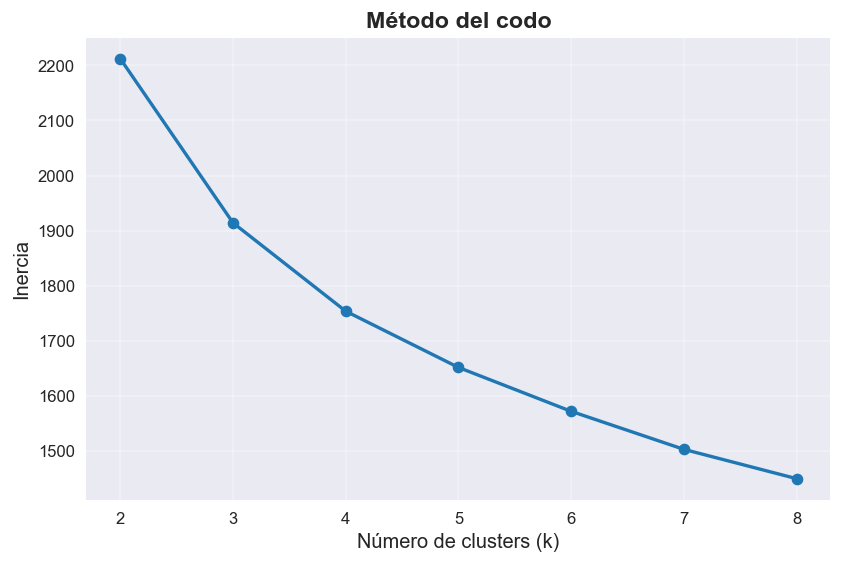

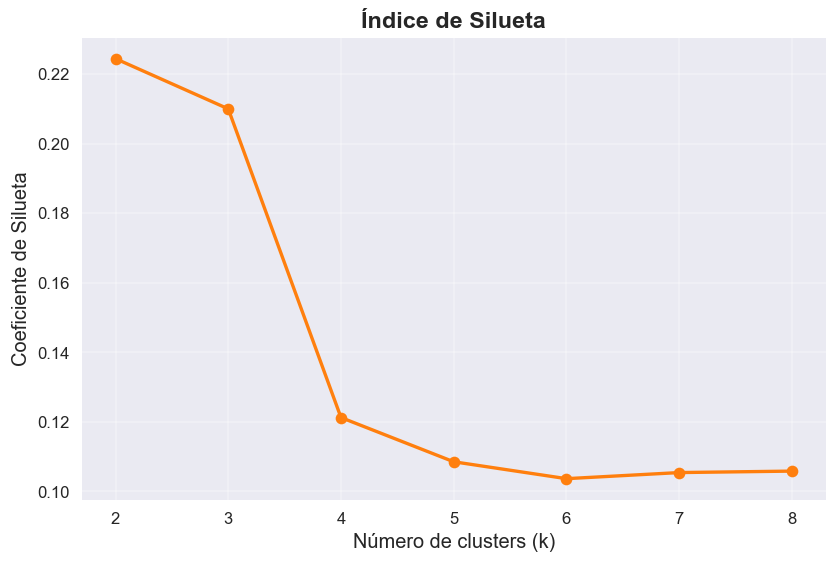

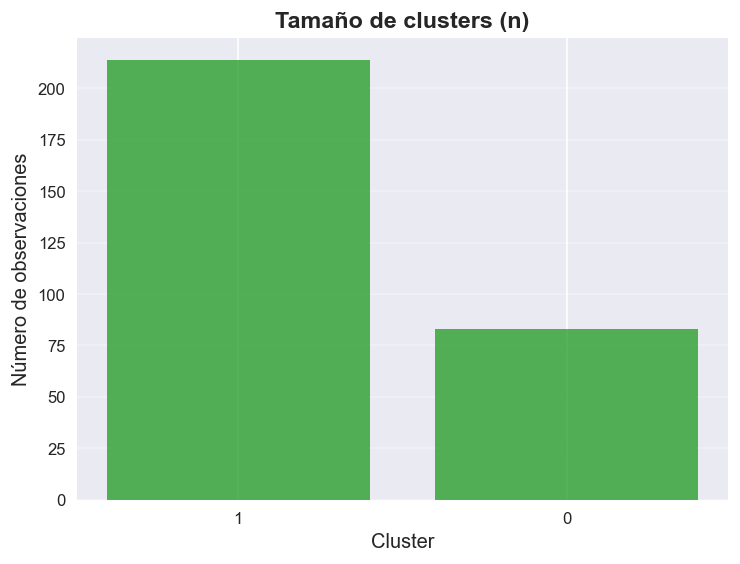

C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\870157667.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {c}" for c in sorted(dfn['cluster_km'].unique())],


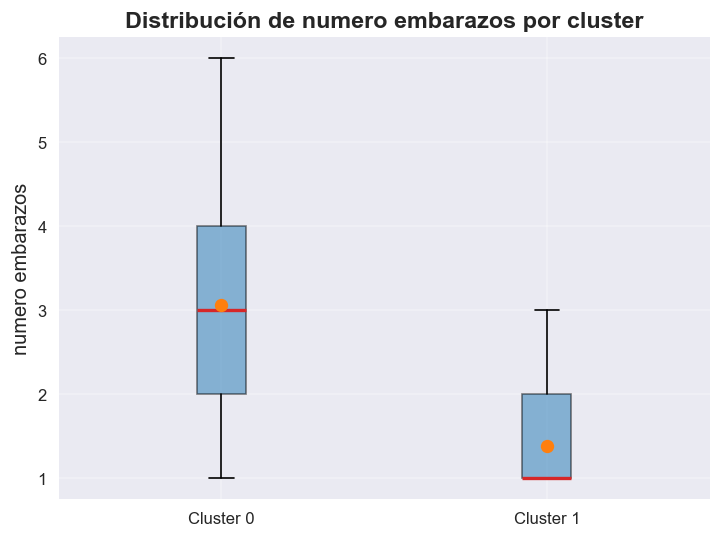

C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\870157667.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {c}" for c in sorted(dfn['cluster_km'].unique())],


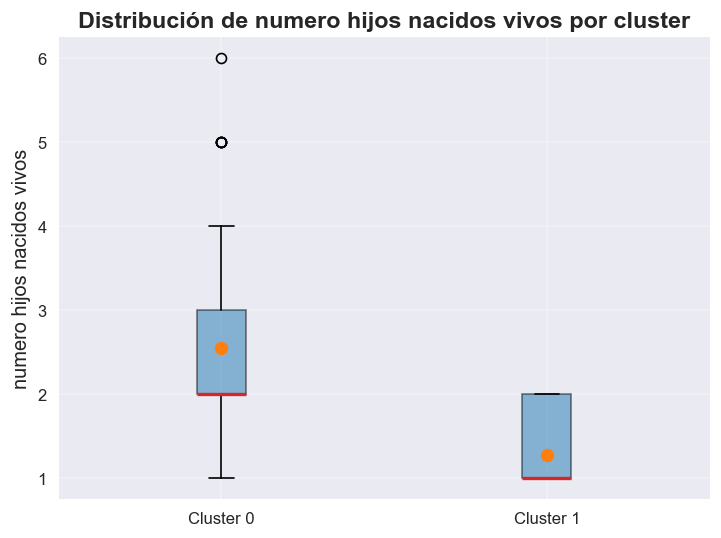

C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\870157667.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {c}" for c in sorted(dfn['cluster_km'].unique())],


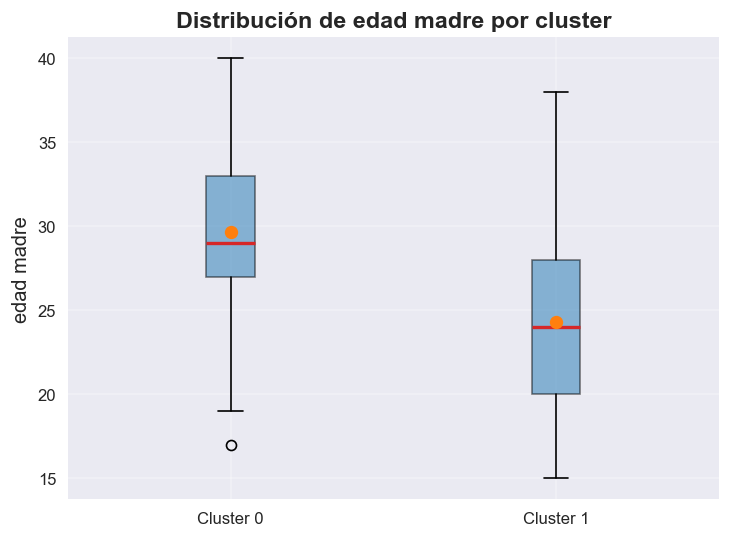

C:\Users\Acer\AppData\Local\Temp\ipykernel_15444\870157667.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[f"Cluster {c}" for c in sorted(dfn['cluster_km'].unique())],


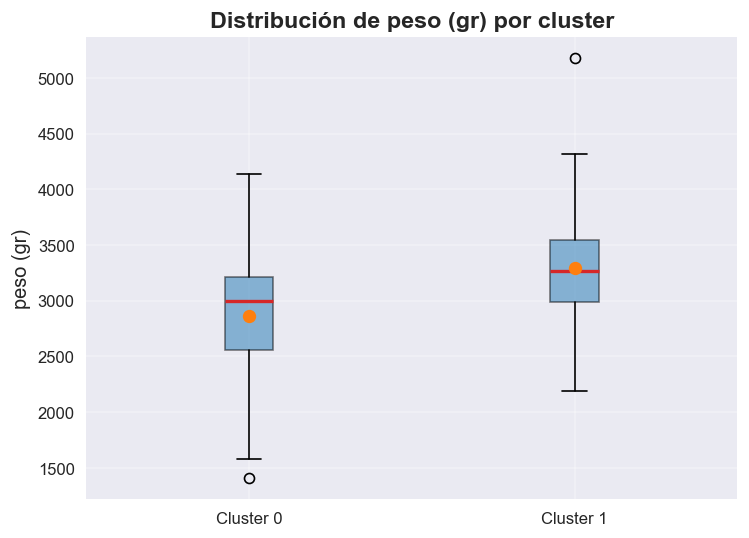

In [38]:
# ==========================================================
# VISUALIZACIÓN DE RESULTADOS DE CLUSTERING
# ----------------------------------------------------------
# Este bloque genera diferentes gráficos para analizar y 
# validar la segmentación por K-Means:
#   1) Método del codo -> Inercia por número de clusters.
#   2) Índice de silueta -> Calidad de la separación.
#   3) Tamaño de cada cluster -> Conteo de observaciones.
#   4) Boxplots comparativos -> Distribución de variables clave.
#
# Se utilizan estilos y colores personalizados para mejorar 
# la interpretación visual de los resultados.
# ==========================================================

import matplotlib.pyplot as plt

# Estilo general
plt.style.use("seaborn-v0_8")
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# --- 1) Codo ---
plt.figure(figsize=(8,5), dpi=120)
plt.plot(tabla_k["k"], tabla_k["Inercia (codo)"], marker="o", color=colors[0], linewidth=2)
plt.title("Método del codo", fontsize=14, weight="bold")
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Inercia", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# --- 2) Silueta ---
plt.figure(figsize=(8,5), dpi=120)
plt.plot(tabla_k["k"], tabla_k["Silueta"], marker="o", color=colors[1], linewidth=2)
plt.title("Índice de Silueta", fontsize=14, weight="bold")
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Coeficiente de Silueta", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# --- 3) Barras tamaños de cluster ---
plt.figure(figsize=(7,5), dpi=120)
plt.bar(tam_clusters["cluster_km"].astype(str), tam_clusters["n"], color=colors[2], alpha=0.8)
plt.title("Tamaño de clusters (n)", fontsize=14, weight="bold")
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Número de observaciones", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.show()

# --- 4) Boxplots por cluster (ejemplo con 4 variables) ---
vars_box = ['numero embarazos', 'numero hijos nacidos vivos', 'edad madre', 'peso (gr)']
for v in [c for c in vars_box if c in dfn.columns]:
    plt.figure(figsize=(7,5), dpi=120)
    data = [dfn.loc[dfn['cluster_km']==c, v].dropna() for c in sorted(dfn['cluster_km'].unique())]
    plt.boxplot(data, labels=[f"Cluster {c}" for c in sorted(dfn['cluster_km'].unique())],
                showmeans=True, patch_artist=True,
                boxprops=dict(facecolor=colors[0], alpha=0.5),
                medianprops=dict(color=colors[3], linewidth=2),
                meanprops=dict(marker="o", markerfacecolor=colors[1], markersize=8))
    plt.title(f"Distribución de {v} por cluster", fontsize=14, weight="bold")
    plt.ylabel(v, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


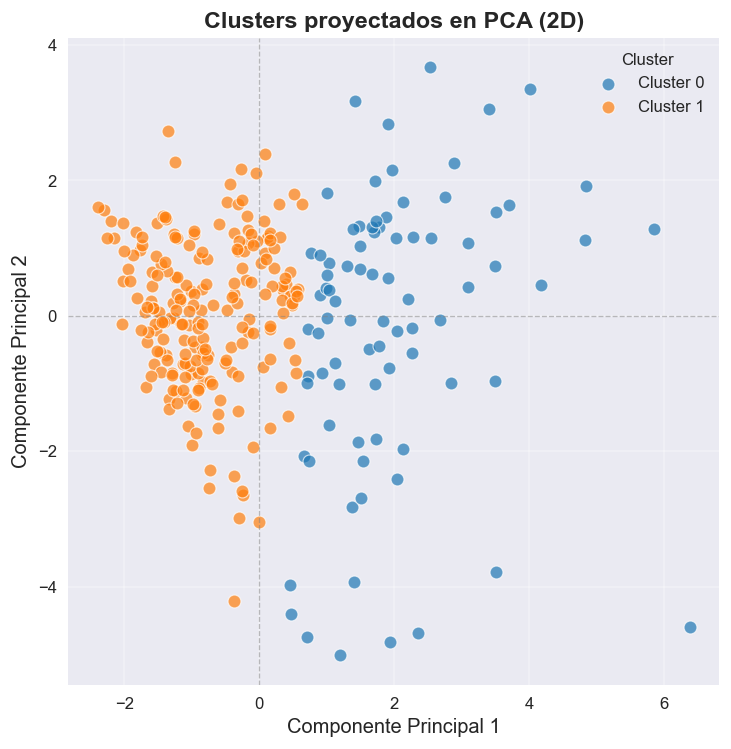

In [40]:
# ----------------------------------------------------------
# --- 5) Scatter plot PCA 2D -------------------------------
# ---------------------------------------------------------- 
   
# Reducir a 2 dimensiones con PCA
pca_vis = PCA(n_components=2)
Z = pca_vis.fit_transform(X.toarray() if hasattr(X, "toarray") else X)

# Paleta consistente (ajusta según # clusters)
clusters = sorted(dfn['cluster_km'].unique())
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  

plt.figure(figsize=(7,7), dpi=120)

for i, c in enumerate(clusters):
    plt.scatter(
        Z[dfn['cluster_km']==c, 0],
        Z[dfn['cluster_km']==c, 1],
        label=f"Cluster {c}",
        s=60,
        alpha=0.7,
        edgecolor="white",
        linewidth=0.7,
        color=colors[i % len(colors)]
    )

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8, alpha=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8, alpha=0.5)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.title("Clusters proyectados en PCA (2D)", fontsize=14, weight="bold")
plt.legend(title="Cluster", fontsize=10)
plt.grid(alpha=0.3)
plt.show()



### Análisis e interpretación de los clusters en PCA (2D)

La gráfica muestra cómo los datos se distribuyen en dos dimensiones principales obtenidas con PCA, permitiendo visualizar los clusters formados por el modelo. Se observan claramente dos grupos diferenciados: el cluster 0 (azul), más disperso hacia la derecha y con mayor variabilidad, y el cluster 1 (naranja), más concentrado y ubicado hacia la izquierda. Esta separación indica que existen patrones distintos en las variables originales que explican la formación de los grupos. La posición en el plano PCA refleja combinaciones de factores como edad, consultas prenatales y peso del recién nacido que ayudan a distinguir perfiles de madres e hijos. En conclusión, el modelo logra capturar diferencias estructurales relevantes y agrupar observaciones con características similares.
